In [2]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [4]:
# Read in our data
Bit_df = pd.read_csv("./Resources/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
Bit_df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Bit_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [8]:
Bit_df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [5]:
# Find null values
for column in df.columns:
    print(f'Column {column} has {df[column].isnull().sum()} null values')

Column Timestamp has 0 null values
Column Open has 1243608 null values
Column High has 1243608 null values
Column Low has 1243608 null values
Column Close has 1243608 null values
Column Volume_(BTC) has 1243608 null values
Column Volume_(Currency) has 1243608 null values
Column Weighted_Price has 1243608 null values


In [9]:
Bit_df.describe

<bound method NDFrame.describe of           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0        1325317920      4.39      4.39      4.39      4.39      0.455581   
1        1325317980       NaN       NaN       NaN       NaN           NaN   
2        1325318040       NaN       NaN       NaN       NaN           NaN   
3        1325318100       NaN       NaN       NaN       NaN           NaN   
4        1325318160       NaN       NaN       NaN       NaN           NaN   
...             ...       ...       ...       ...       ...           ...   
4857372  1617148560  58714.31  58714.31  58686.00  58686.00      1.384487   
4857373  1617148620  58683.97  58693.43  58683.97  58685.81      7.294848   
4857374  1617148680  58693.43  58723.84  58693.43  58723.84      1.705682   
4857375  1617148740  58742.18  58770.38  58742.18  58760.59      0.720415   
4857376  1617148800  58767.75  58778.18  58755.97  58778.18      2.712831   

         Volume_(Currency)  Weighted_Pric

In [12]:
Bit_df.dropna(inplace=True)
Bit_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [13]:
Bit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


In [14]:
# Rename Timestamp and Weighted Price
# Rename Timestamp and Weighted_Price
Bit_df.rename(columns = {'Timestamp':'Last Update', 'Weighted_Price':'Weighted Price'}, inplace = True)
# show the first 5 rows
Bit_df.head()

,Last Update,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [17]:
# Convert Timestamp into TimeZone (ET)
Bit_df['Last Update'] = (pd.to_datetime(Bit_df['Last Update'], unit='s')
                     .dt.tz_localize('est')
                     .dt.tz_convert('America/New_York'))
# show the first 5 rows
Bit_df.head()

,Last Update,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted Price
0,2011-12-31 07:52:00-05:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00-05:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00-05:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00-05:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00-05:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [19]:
# Esport Clean DF into CSV
Bit_df.to_csv ('./Resources/Bitcoin_2011-2020_Clean.csv', index = False, header=True)

In [21]:
# Importing date libraries to split date info in different colummns and remove Last Update column
import datetime as dt
Bit_df["Date"]=pd.to_datetime(Bit_df["Last Update"])
Bit_df['Date_year'] = Bit_df["Last Update"].dt.year
Bit_df['Date_month'] = Bit_df["Last Update"].dt.month
Bit_df['Date_day'] = Bit_df["Last Update"].dt.day
Bit_df['Date_hour'] = Bit_df["Last Update"].dt.hour
Bit_df['Date_minute'] = Bit_df["Last Update"].dt.minute
Bit_df['Date_seconde'] = Bit_df["Last Update"].dt.second

In [22]:
Bit_df.drop(['Last Update'],1,inplace=True)

C:\Users\melen\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
# Preparing for linear regression model
X=Bit_df.drop(["Weighted Price",'Date'], axis=1)
Y=Bit_df["Weighted Price"]
X.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,4.39,4.39,4.39,4.39,0.455581,2.000000,2011,12,31,7,52,0
478,4.39,4.39,4.39,4.39,48.000000,210.720000,2011,12,31,15,50,0
547,4.50,4.57,4.50,4.57,37.862297,171.380338,2011,12,31,16,59,0
548,4.58,4.58,4.58,4.58,9.000000,41.220000,2011,12,31,17,0,0
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,2012,1,1,4,16,0


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

print(X_train)

            Open     High      Low    Close  Volume_(BTC)  Volume_(Currency)  \
1508810   432.59   432.59   432.00   432.59     22.053634        9540.159642   
2647001   819.76   820.64   819.76   819.86      0.705602         578.934777   
1640916   237.71   237.71   237.71   237.71      0.034900           8.296079   
2376570   647.05   647.05   647.00   647.00      7.727975        5000.060960   
1054271   736.07   736.07   736.07   736.07      1.563771        1151.044964   
...          ...      ...      ...      ...           ...                ...   
1703706   246.34   246.36   245.84   245.84      5.508569        1355.377483   
1231048   439.70   439.70   439.70   439.70      0.147000          64.635900   
3797360  3883.16  3883.84  3882.81  3882.81      0.344505        1337.728838   
1231773   434.80   434.80   434.80   434.80      0.153920          66.924416   
755102    108.70   108.70   108.70   108.70      0.989972         107.610000   

         Date_year  Date_month  Date_da

In [25]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_predict = regression_model.predict(X_test)
print(Y_predict)
Y_trainpredict = regression_model.predict(X_train)
print(Y_trainpredict)

[ 5238.37293062   885.58639707  6875.57868651 ...  8162.86051731
   133.67468525 10262.10310547]
[ 432.32712641  820.23327382  237.64788315 ... 3883.50481398  434.72995383
  108.57789929]


Text(0.5, 1.0, 'Actual Vs Predict')

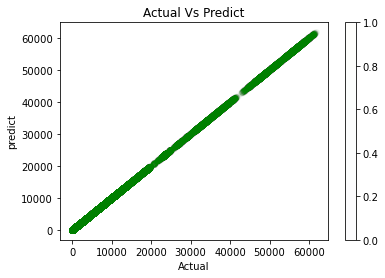

In [28]:
plt.scatter(Y_test,Y_predict, c = 'green', alpha = 0.01, cmap='Spectral')
plt.colorbar()
plt.xlabel("Actual")
plt.ylabel("predict")
plt.title("Actual Vs Predict")

In [29]:
#Predcited values difference
pred_y_df = pd.DataFrame({'Actual Value': Y_test,'Predicted Value':Y_predict, 'Difference': Y_test-Y_predict})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
3848950,5238.335917,5238.372931,-0.037014
2651468,885.530000,885.586397,-0.056397
4180833,6877.593959,6875.578687,2.015273
1729616,222.854033,222.851183,0.002850
4376385,8678.668753,8682.518810,-3.850057
4405526,9486.326805,9485.482891,0.843914
4800121,51343.674788,51361.106219,-17.431431
3499414,6931.129439,6930.492671,0.636768
4833832,59862.713320,59875.165975,-12.452655
4459404,9141.951290,9143.052388,-1.101098


In [30]:
#Model performance evaluation
#MAE
from sklearn.metrics import mean_absolute_error
print("Train:MAE",mean_absolute_error(Y_train,Y_trainpredict))
print("Test:MAE",mean_absolute_error(Y_test,Y_predict))

Train:MAE 1.5558156941896335
Test:MAE 1.5593641363145185


In [31]:
#RMSE
from sklearn.metrics import mean_squared_error
print("Train:RMSE",np.sqrt(mean_squared_error(Y_train,Y_trainpredict)))
print("Test:RMSE",np.sqrt(mean_squared_error(Y_test,Y_predict)))

Train:RMSE 3.968101725369008
Test:RMSE 3.999505164383183


In [32]:
#R2
from sklearn.metrics import r2_score
r2_test = r2_score(Y_train,Y_trainpredict)
print("Train R2:", r2_test)
r2_test = r2_score(Y_test,Y_predict)
print("Test R2:", r2_test)

Train R2: 0.9999998054298936
Test R2: 0.999999802357377
